In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [3]:
# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/647a7a98-f0ab-46f5-a235-
[nltk_data]     7a968e81ddf6/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/647a7a98-f0ab-46f5-a235-
[nltk_data]     7a968e81ddf6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/647a7a98-f0ab-46f5-a235-
[nltk_data]     7a968e81ddf6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/647a7a98-f0ab-46f5-a235-
[nltk_data]     7a968e81ddf6/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
# Load dataset (example using a sample dataset)
# In practice, you would load your own dataset (tweets, reviews, etc.)
# For demonstration, let's create a sample dataset
data = {
    'text': [
        "I love this product! It's amazing.",
        "Terrible experience, would not recommend.",
        "It's okay, nothing special.",
        "The service was excellent and fast.",
        "Worst purchase ever, complete waste of money.",
        "Pretty good, but could be better.",
        "Absolutely fantastic! 5 stars!",
        "Meh, it's average at best.",
        "The quality is outstanding!",
        "Broken on arrival, very disappointed."
    ],
    'sentiment': ['positive', 'negative', 'neutral', 'positive', 
                 'negative', 'neutral', 'positive', 'neutral', 
                 'positive', 'negative']
}

df = pd.DataFrame(data)
print(df.head())

                                            text sentiment
0             I love this product! It's amazing.  positive
1      Terrible experience, would not recommend.  negative
2                    It's okay, nothing special.   neutral
3            The service was excellent and fast.  positive
4  Worst purchase ever, complete waste of money.  negative


In [6]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [7]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and numbers
    text = ''.join([char for char in text if char.isalpha() or char == ' '])
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display before and after
print("\nOriginal vs Cleaned Text:")
print(df[['text', 'cleaned_text']].head())


Original vs Cleaned Text:
                                            text  \
0             I love this product! It's amazing.   
1      Terrible experience, would not recommend.   
2                    It's okay, nothing special.   
3            The service was excellent and fast.   
4  Worst purchase ever, complete waste of money.   

                               cleaned_text  
0                      love product amazing  
1       terrible experience would recommend  
2                      okay nothing special  
3                    service excellent fast  
4  worst purchase ever complete waste money  


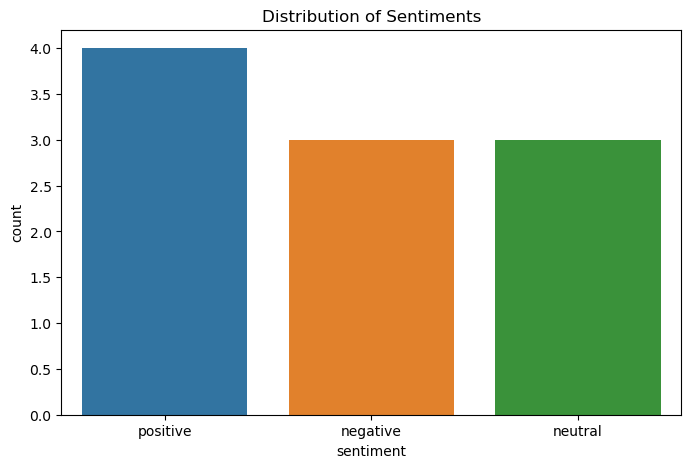

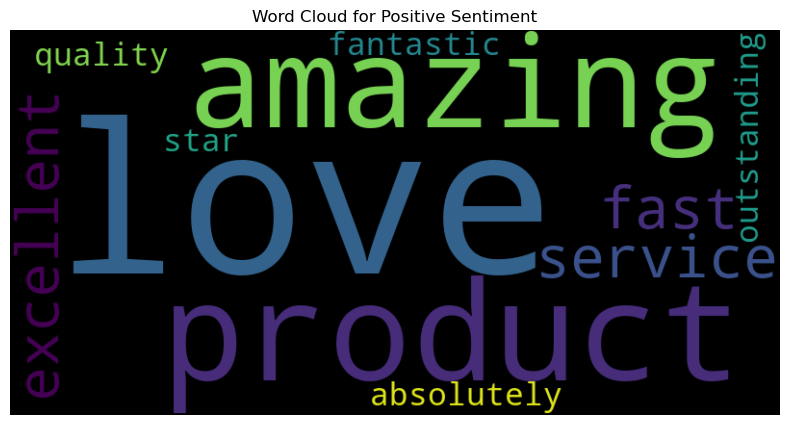

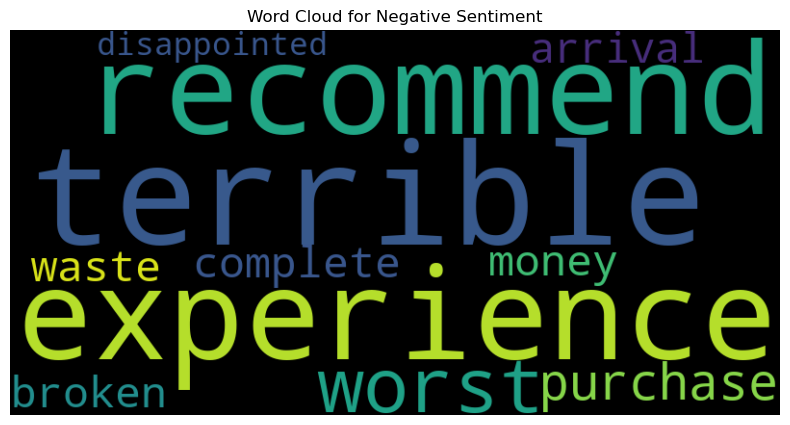

In [8]:
# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Word cloud for positive sentiment
positive_text = ' '.join(df[df['sentiment'] == 'positive']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400).generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

# Word cloud for negative sentiment
negative_text = ' '.join(df[df['sentiment'] == 'negative']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400).generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')
plt.show()

In [9]:
# Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['cleaned_text'])
y = df['sentiment']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (8, 34), Test shape: (2, 34)



Logistic Regression Results:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       1.0
     neutral       0.00      0.00      0.00       0.0
    positive       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

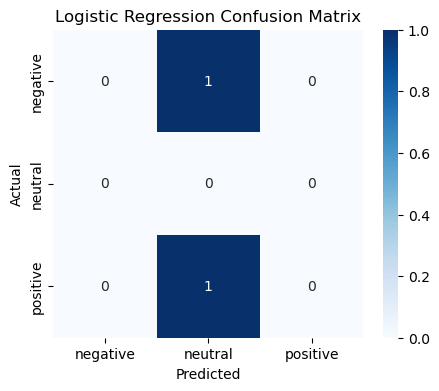


Naive Bayes Results:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

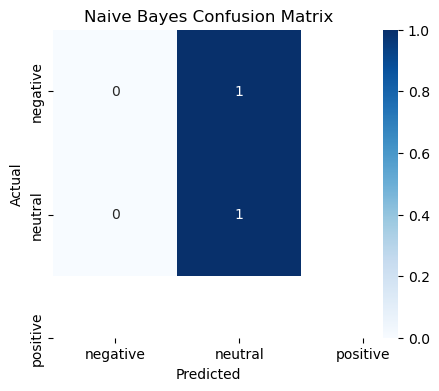


SVM Results:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
    positive       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

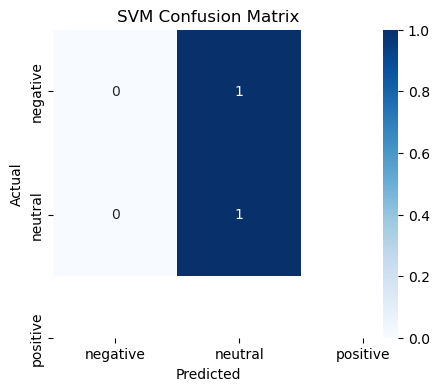


Model Comparison:
                 Model  Accuracy
1          Naive Bayes       0.5
2                  SVM       0.5
0  Logistic Regression       0.0


In [10]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(kernel='linear')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Compare model performance
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("\nModel Comparison:")
print(results_df.sort_values(by='Accuracy', ascending=False))


Top words contributing to each sentiment:

NEGATIVE:
broken          0.326605
arrival         0.326605
disappointed    0.326605
waste           0.230944
worst           0.230944
complete        0.230944
ever            0.230944
money           0.230944
purchase        0.230944
quality         0.000000
Name: negative, dtype: float64


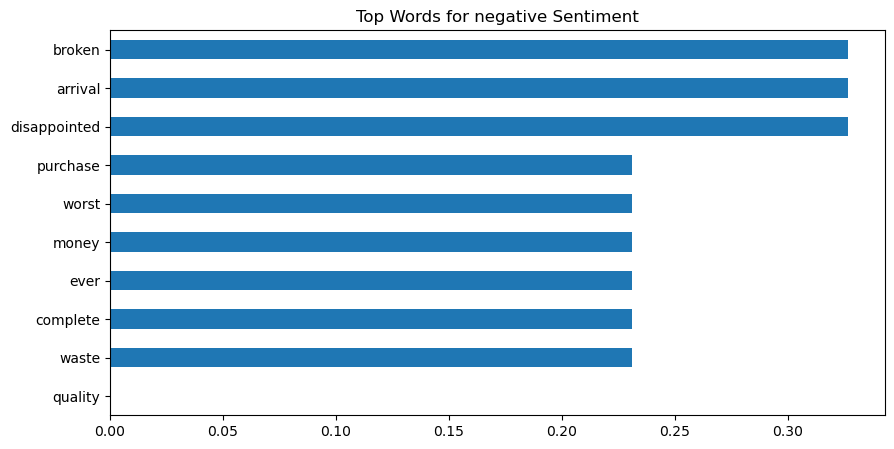


NEUTRAL:
best       0.262257
average    0.262257
okay       0.262257
special    0.262257
meh        0.262257
nothing    0.262257
pretty     0.227121
could      0.227121
good       0.227121
better     0.227121
Name: neutral, dtype: float64


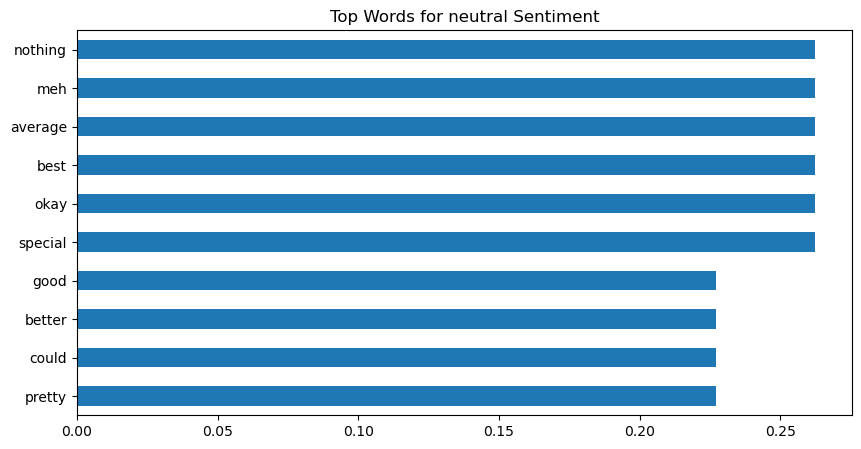


POSITIVE:
absolutely    0.262257
amazing       0.262257
fast          0.262257
love          0.262257
fantastic     0.262257
excellent     0.262257
service       0.262257
star          0.262257
product       0.262257
experience    0.000000
Name: positive, dtype: float64


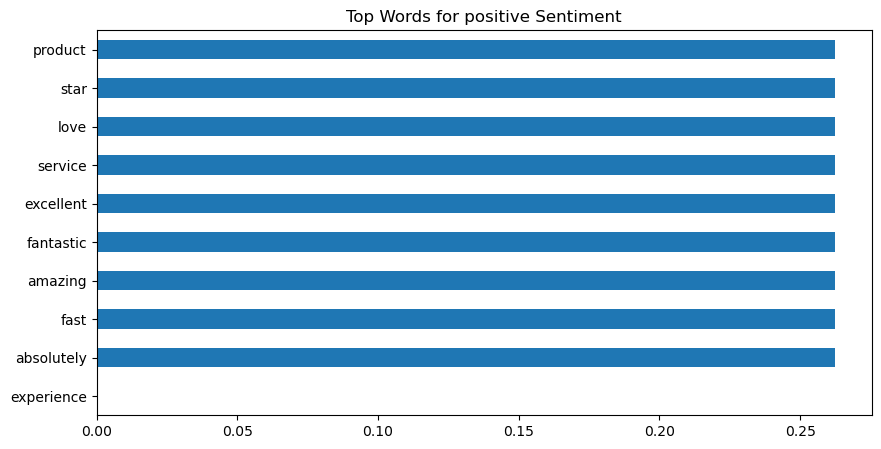


Text: This is the best thing I've ever bought!
Cleaned: best thing ive ever bought
Predicted Sentiment: neutral
Probabilities:
negative: 0.27
neutral: 0.42
positive: 0.31

Text: I'm really unhappy with the quality.
Cleaned: im really unhappy quality
Predicted Sentiment: neutral
Probabilities:
negative: 0.25
neutral: 0.38
positive: 0.38

Text: It's neither good nor bad, just average.
Cleaned: neither good bad average
Predicted Sentiment: neutral
Probabilities:
negative: 0.20
neutral: 0.50
positive: 0.29


In [11]:
# Get feature importance from Logistic Regression
lr = models['Logistic Regression']
feature_names = tfidf.get_feature_names_out()
coefs = lr.coef_

# Create DataFrame for coefficients
coef_df = pd.DataFrame(coefs.T, index=feature_names, 
                      columns=lr.classes_)

# Top words for each sentiment
print("\nTop words contributing to each sentiment:")
for sentiment in lr.classes_:
    top_words = coef_df[sentiment].sort_values(ascending=False).head(10)
    print(f"\n{sentiment.upper()}:")
    print(top_words)
    
    # Plot top words
    plt.figure(figsize=(10, 5))
    top_words.sort_values().plot(kind='barh')
    plt.title(f'Top Words for {sentiment} Sentiment')
    plt.show()

# Example prediction on new text
def predict_sentiment(text):
    cleaned = preprocess_text(text)
    vector = tfidf.transform([cleaned])
    prediction = lr.predict(vector)[0]
    probability = lr.predict_proba(vector)[0]
    
    print(f"\nText: {text}")
    print(f"Cleaned: {cleaned}")
    print(f"Predicted Sentiment: {prediction}")
    print("Probabilities:")
    for i, cls in enumerate(lr.classes_):
        print(f"{cls}: {probability[i]:.2f}")

# Test with new examples
predict_sentiment("This is the best thing I've ever bought!")
predict_sentiment("I'm really unhappy with the quality.")
predict_sentiment("It's neither good nor bad, just average.")